In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Đọc dữ liệu
data = pd.read_csv('C:/Users/Admin/Desktop/FPT/CSD/Health_Sleep_Statistics.csv') 
data.columns = data.columns.str.replace(' ', '_') 

# Phân chia biến phụ thuộc (y) và các biến độc lập (X)
y = data['Sleep_Quality']  # Biến phụ thuộc

### Mô hình Hồi quy tuyến tính đơn giản
# Dữ liệu chỉ gồm cột 'Daily_Steps' cho X
X_simple = data[['Daily_Steps']]

# Chia tập train và test
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(X_simple, y, test_size=0.2, random_state=42)

# Tạo và huấn luyện mô hình
simple_model = LinearRegression()
simple_model.fit(X_train_simple, y_train_simple)

# Dự đoán và đánh giá mô hình
y_pred_simple = simple_model.predict(X_test_simple)
mse_simple = mean_squared_error(y_test_simple, y_pred_simple)
r2_simple = r2_score(y_test_simple, y_pred_simple)
mae_simple = mean_absolute_error(y_test_simple, y_pred_simple)  # Tính MAE

print("Simple Linear Regression")
print("MSE:", mse_simple)
print("R^2 Score:", r2_simple)
print("MAE:", mae_simple)  # In MAE

### Mô hình Hồi quy tuyến tính bội
# Dữ liệu gồm tất cả các cột còn lại, loại bỏ các cột không cần thiết
X_multiple = data.drop(columns=['User_ID', 'Sleep_Quality', 'Bedtime', 'Wake-up_Time'])
categorical_cols = X_multiple.select_dtypes(include=['object']).columns  # Xác định các cột phân loại

# Tạo pipeline xử lý biến phân loại và huấn luyện mô hình
pipeline = Pipeline(steps=[
    ('preprocessor', ColumnTransformer(transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_cols)], remainder='passthrough')),
    ('regressor', LinearRegression())
])

# Chia tập train và test
X_train_multiple, X_test_multiple, y_train_multiple, y_test_multiple = train_test_split(X_multiple, y, test_size=0.2, random_state=42)

# Huấn luyện và dự đoán với mô hình hồi quy bội
pipeline.fit(X_train_multiple, y_train_multiple)
y_pred_multiple = pipeline.predict(X_test_multiple)

# Đánh giá mô hình
mse_multiple = mean_squared_error(y_test_multiple, y_pred_multiple)
r2_multiple = r2_score(y_test_multiple, y_pred_multiple)
mae_multiple = mean_absolute_error(y_test_multiple, y_pred_multiple)  # Tính MAE

print("\nMultiple Linear Regression")
print("MSE:", mse_multiple)
print("R^2 Score:", r2_multiple)
print("MAE:", mae_multiple)  # In MAE


Simple Linear Regression
MSE: 0.18750613776467415
R^2 Score: 0.9404269617904133
MAE: 0.33889052914739354

Multiple Linear Regression
MSE: 0.1330527129164118
R^2 Score: 0.957727493910592
MAE: 0.251266648898036


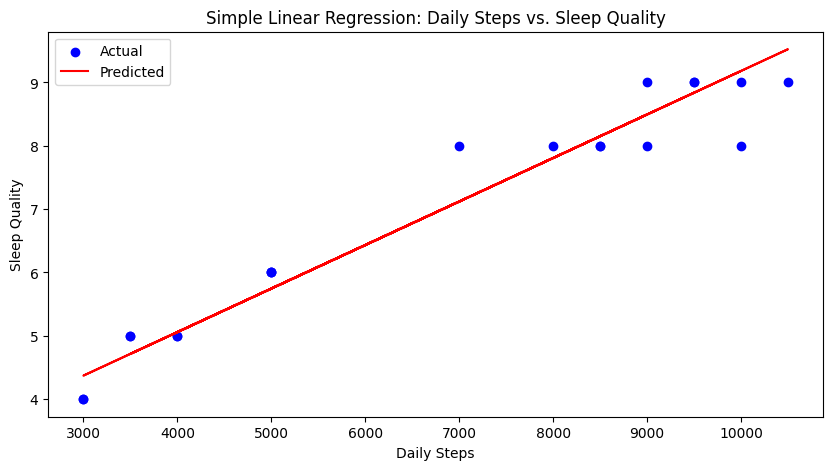

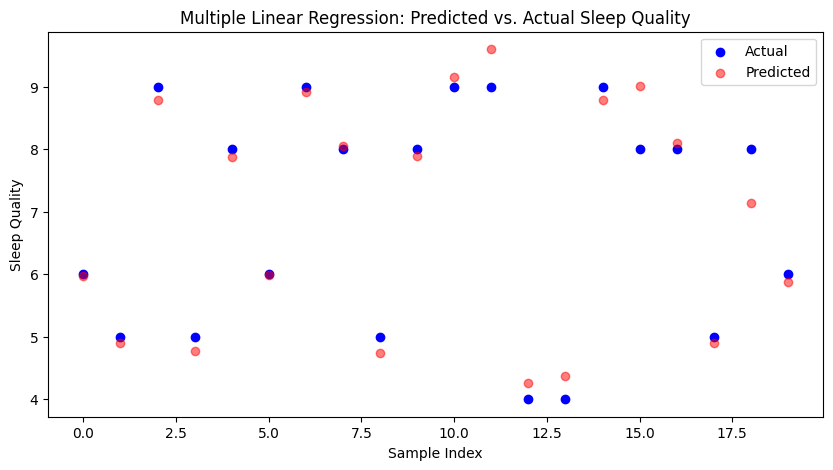

In [10]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 5))
plt.scatter(X_test_simple, y_test_simple, color='blue', label='Actual') 
plt.plot(X_test_simple, y_pred_simple, color='red', label='Predicted')   
plt.title('Simple Linear Regression: Daily Steps vs. Sleep Quality')
plt.xlabel('Daily Steps')
plt.ylabel('Sleep Quality')
plt.legend()
plt.show()


plt.figure(figsize=(10, 5))
plt.scatter(np.arange(len(y_test_multiple)), y_test_multiple, color='blue', label='Actual')  # Dữ liệu thực tế
plt.scatter(np.arange(len(y_test_multiple)), y_pred_multiple, color='red', label='Predicted', alpha=0.5)  # Dự đoán
plt.title('Multiple Linear Regression: Predicted vs. Actual Sleep Quality')
plt.xlabel('Sample Index')
plt.ylabel('Sleep Quality')
plt.legend()
plt.show()

In [8]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.linear_model import LinearRegression


# Lấy dữ liệu cần thiết
X = data['Daily_Steps'].values.reshape(-1, 1)
y = data['Sleep_Quality'].values

# Tạo và huấn luyện mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X, y)

# Hệ số hồi quy
b0 = model.intercept_  # Hệ số chặn
b1 = model.coef_[0]    # Hệ số góc

# Dự đoán giá trị y
y_pred = model.predict(X)

# Tính Standard Error (SE) cho b1
n = len(X)
x_mean = np.mean(X)
SE_b1 = np.sqrt(np.sum((y - y_pred) ** 2) / (n - 2)) / np.sqrt(np.sum((X - x_mean) ** 2))

# Kiểm định giả thuyết cho b1
t_statistic = b1 / SE_b1  # Giá trị t cho b1

# In kết quả
print("Hệ số chặn (b0):", b0)
print("Hệ số góc (b1):", b1)
print("Standard Error của b1 (SE_b1):", SE_b1)
print("Giá trị t của b1:", t_statistic)


Hệ số chặn (b0): 2.3701282943165456
Hệ số góc (b1): 0.0006778728705246639
Standard Error của b1 (SE_b1): 1.5186999453711127e-05
Giá trị t của b1: 44.63507571662008
